# Day9 Homework

Reference :
1. [How to Identify Outliers ](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

# 檢視與處理 Outliers
## Why outliers happen, and common reasons of outlier

Ex. 

1.Unknown Value,or non-sense value like age = 0 or 99999

2.Human/System error, like the some sale's volume on eBay's = 10 billion...etc

# [Goal of the Homework ]
從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [37]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline 
dir_of_data = r'C:\Users\Francis Hung\Desktop\Datatrain'

In [38]:
f_app = os.path.join(dir_of_data,'application_test.csv')
print('Path od data %s'%(f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path od data C:\Users\Francis Hung\Desktop\Datatrain\application_test.csv


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Numbers of remain columns 62
AMT_INCOME_TOTAL


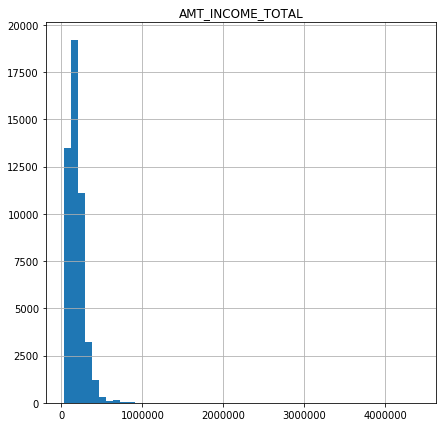

-------------------------------------------------------
AMT_CREDIT


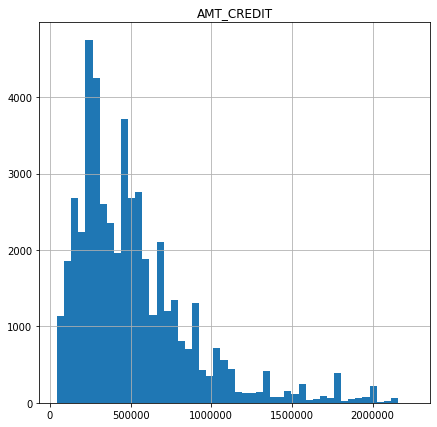

-------------------------------------------------------
AMT_ANNUITY


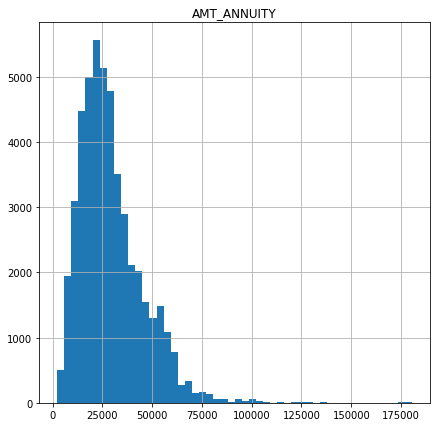

-------------------------------------------------------
AMT_GOODS_PRICE


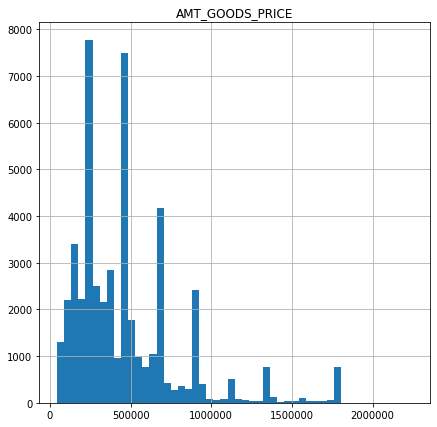

-------------------------------------------------------
REGION_POPULATION_RELATIVE


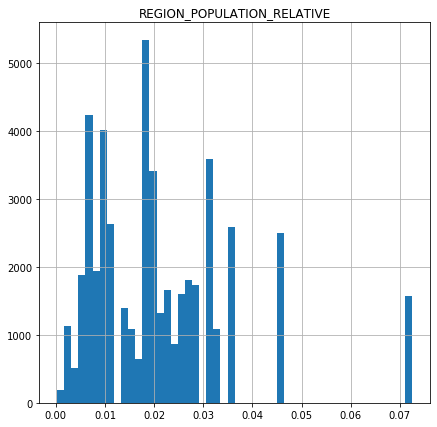

-------------------------------------------------------
OWN_CAR_AGE


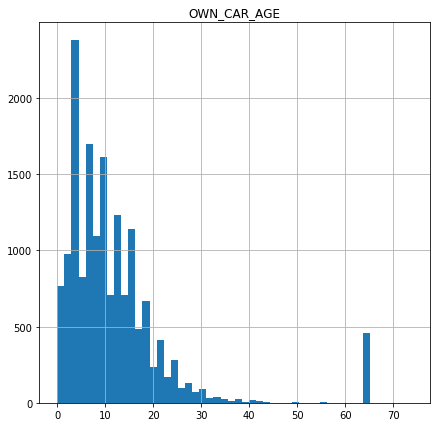

-------------------------------------------------------
EXT_SOURCE_1


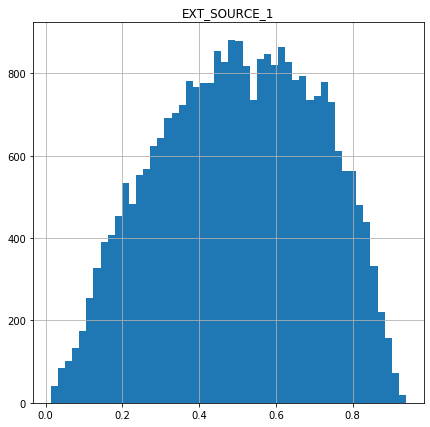

-------------------------------------------------------
EXT_SOURCE_2


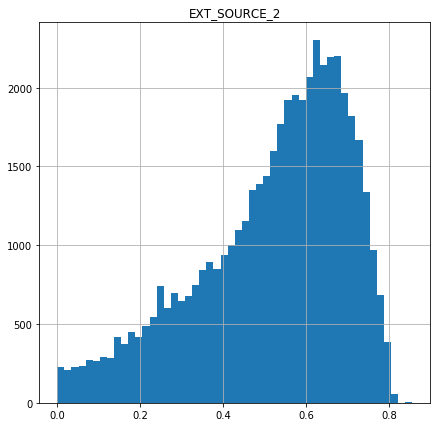

-------------------------------------------------------
EXT_SOURCE_3


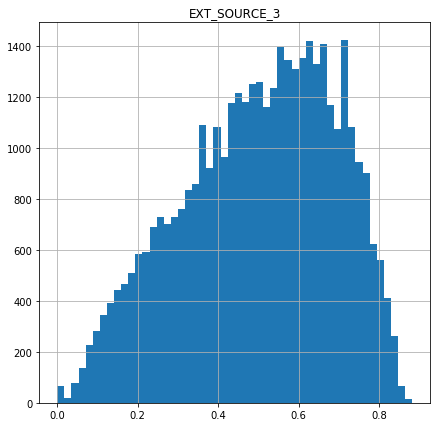

-------------------------------------------------------
APARTMENTS_AVG


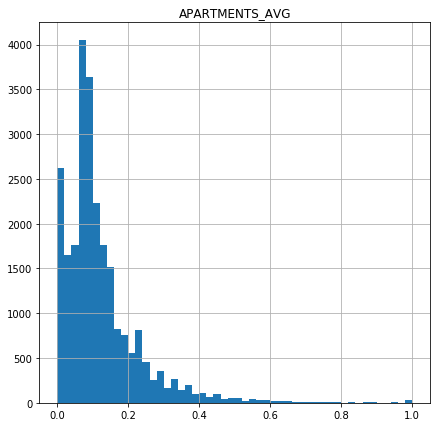

-------------------------------------------------------
BASEMENTAREA_AVG


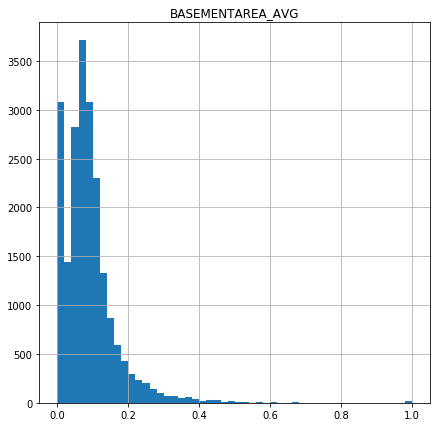

-------------------------------------------------------
YEARS_BEGINEXPLUATATION_AVG


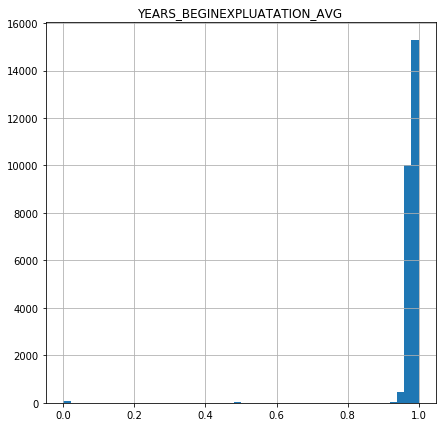

-------------------------------------------------------
YEARS_BUILD_AVG


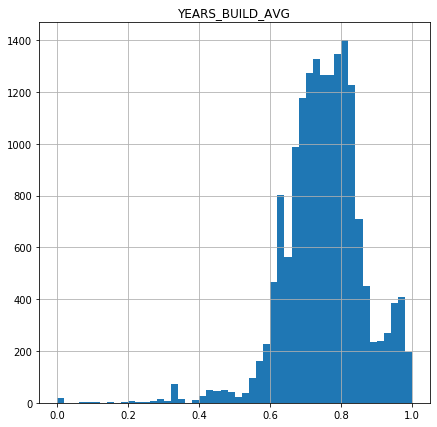

-------------------------------------------------------
COMMONAREA_AVG


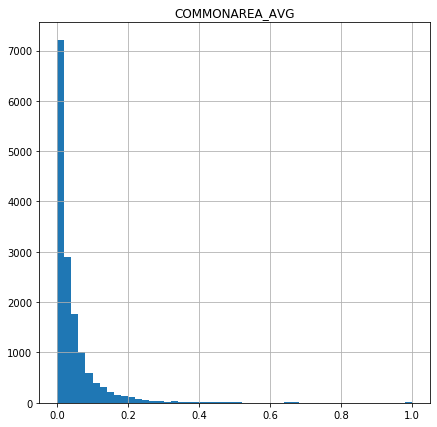

-------------------------------------------------------
ELEVATORS_AVG


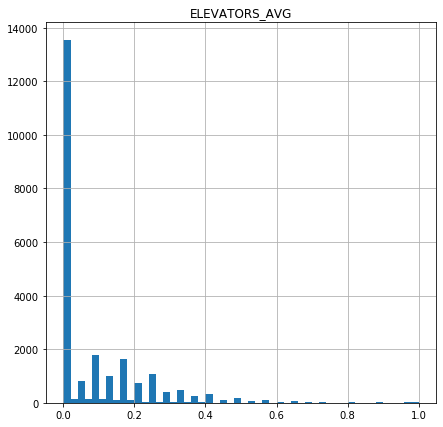

-------------------------------------------------------
ENTRANCES_AVG


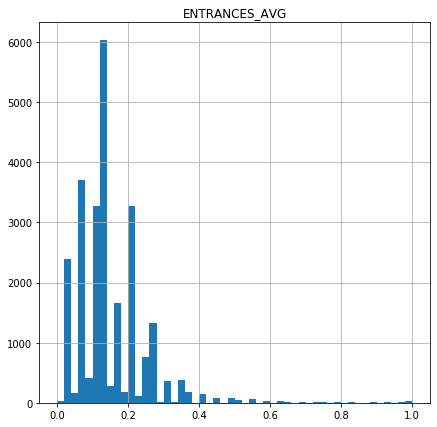

-------------------------------------------------------
FLOORSMAX_AVG


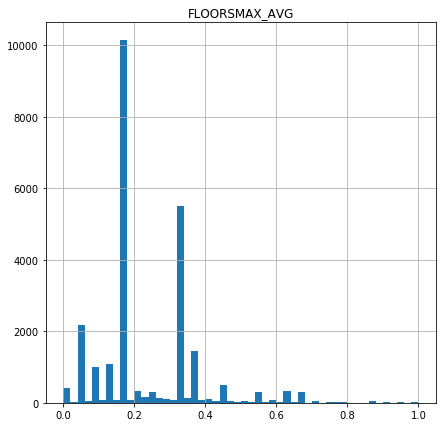

-------------------------------------------------------
FLOORSMIN_AVG


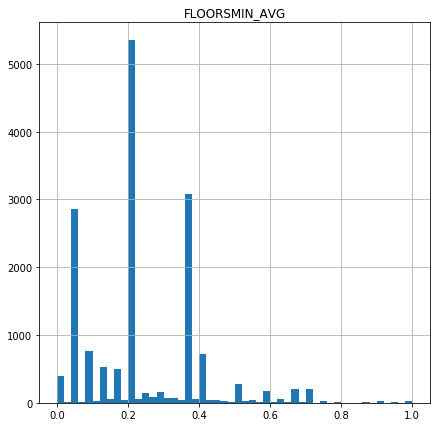

-------------------------------------------------------
LANDAREA_AVG


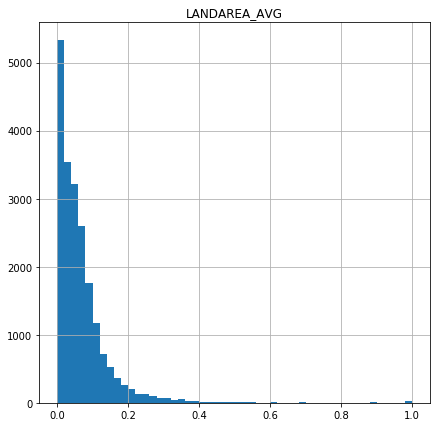

-------------------------------------------------------
LIVINGAPARTMENTS_AVG


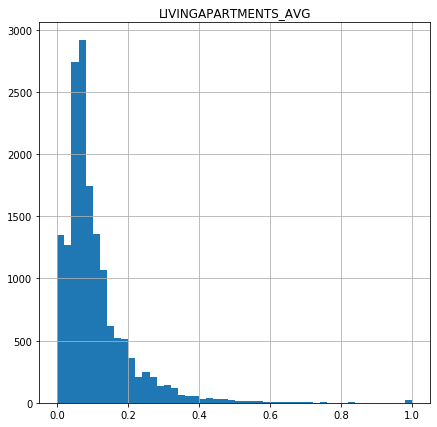

-------------------------------------------------------
LIVINGAREA_AVG


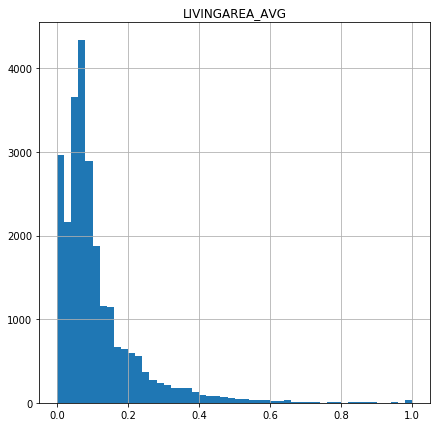

-------------------------------------------------------
NONLIVINGAPARTMENTS_AVG


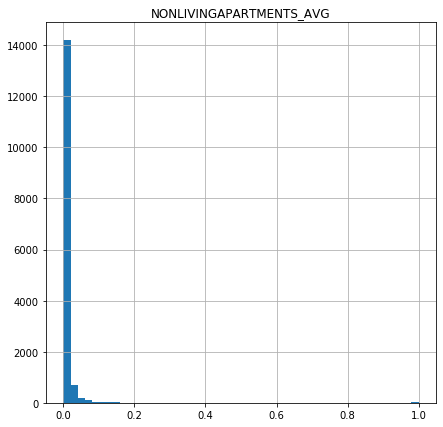

-------------------------------------------------------
NONLIVINGAREA_AVG


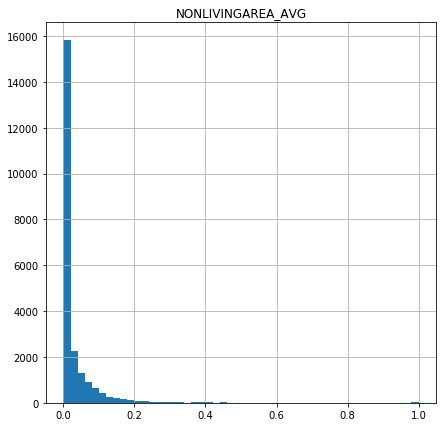

-------------------------------------------------------
APARTMENTS_MODE


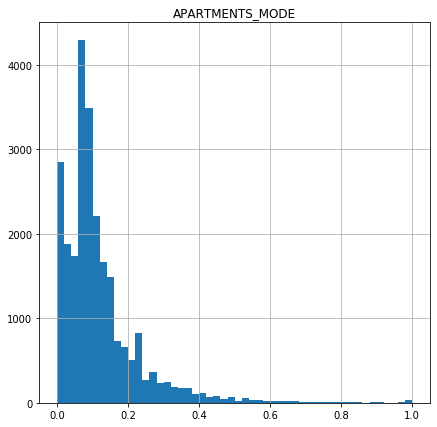

-------------------------------------------------------
BASEMENTAREA_MODE


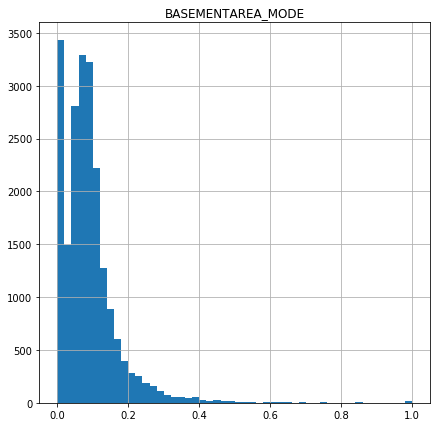

-------------------------------------------------------
YEARS_BEGINEXPLUATATION_MODE


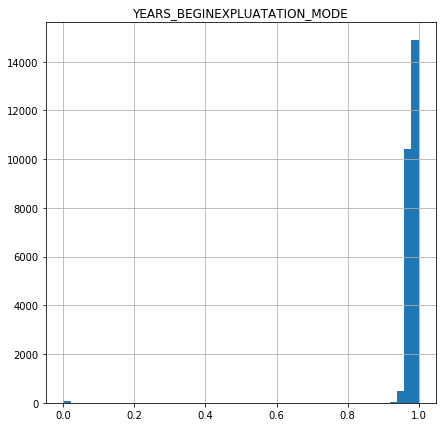

-------------------------------------------------------
YEARS_BUILD_MODE


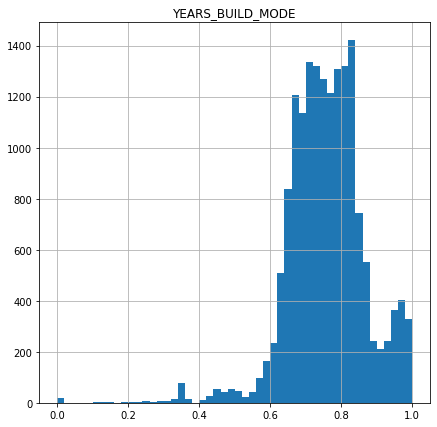

-------------------------------------------------------
COMMONAREA_MODE


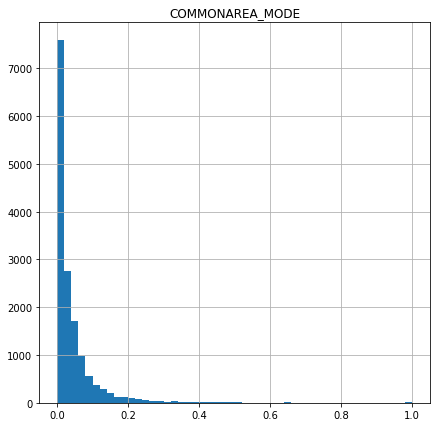

-------------------------------------------------------
ELEVATORS_MODE


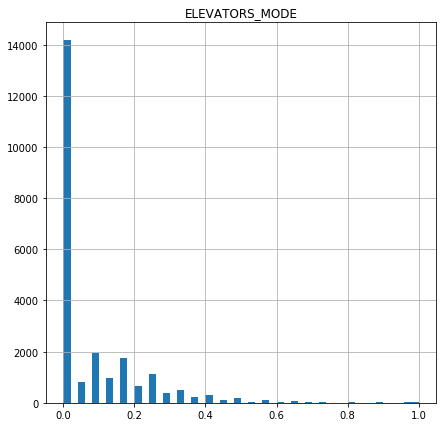

-------------------------------------------------------
ENTRANCES_MODE


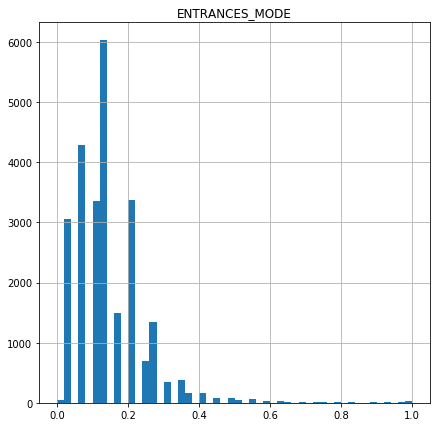

-------------------------------------------------------
FLOORSMAX_MODE


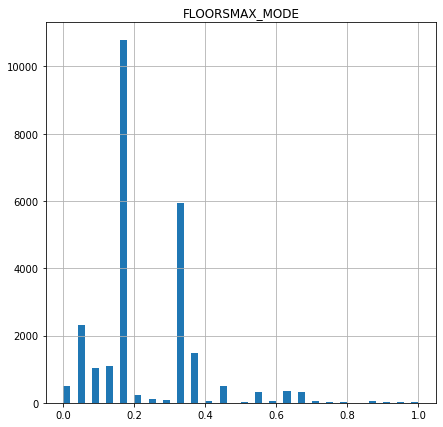

-------------------------------------------------------
FLOORSMIN_MODE


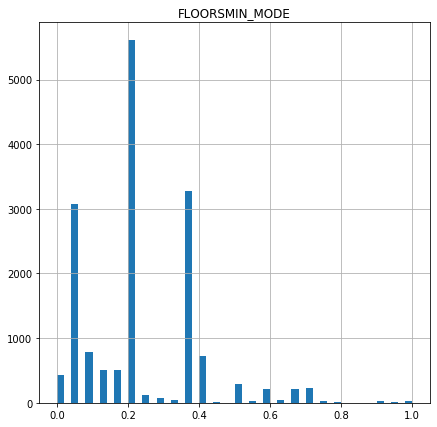

-------------------------------------------------------
LANDAREA_MODE


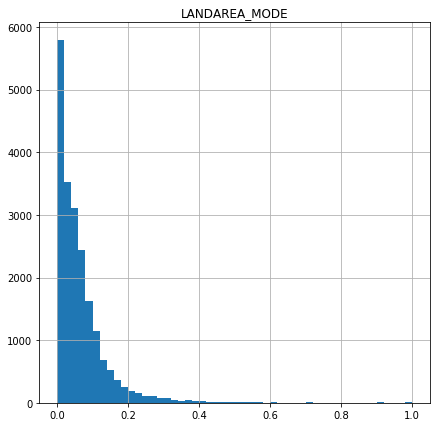

-------------------------------------------------------
LIVINGAPARTMENTS_MODE


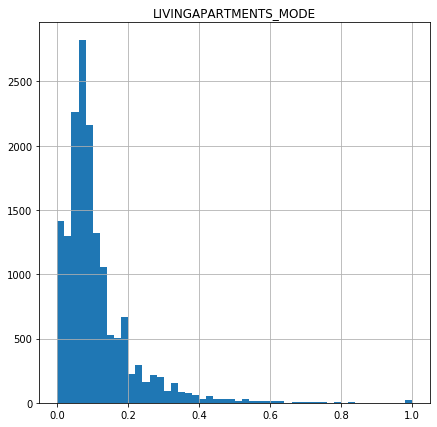

-------------------------------------------------------
LIVINGAREA_MODE


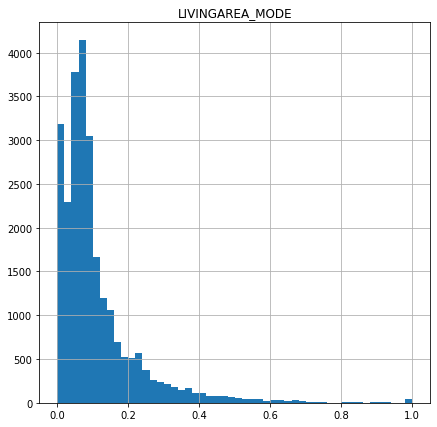

-------------------------------------------------------
NONLIVINGAPARTMENTS_MODE


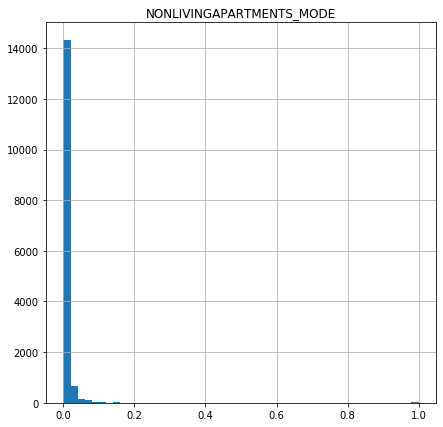

-------------------------------------------------------
NONLIVINGAREA_MODE


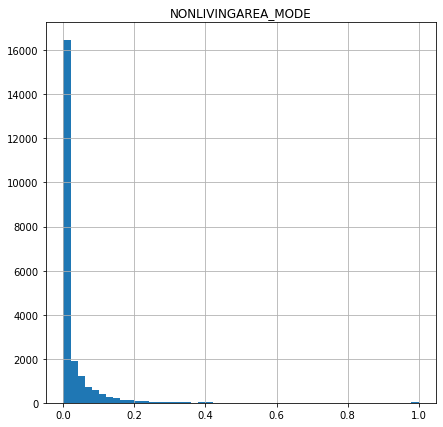

-------------------------------------------------------
APARTMENTS_MEDI


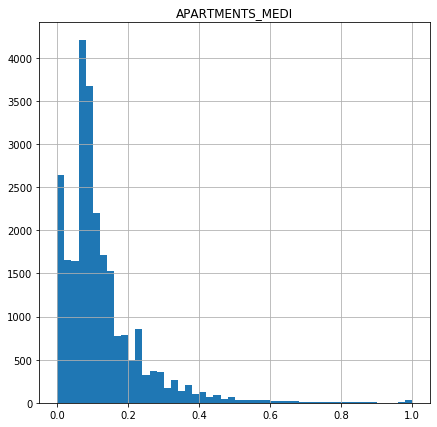

-------------------------------------------------------
BASEMENTAREA_MEDI


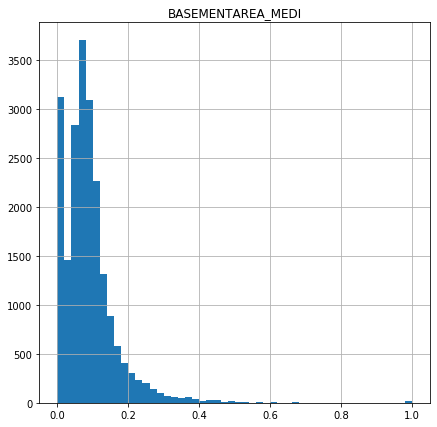

-------------------------------------------------------
YEARS_BEGINEXPLUATATION_MEDI


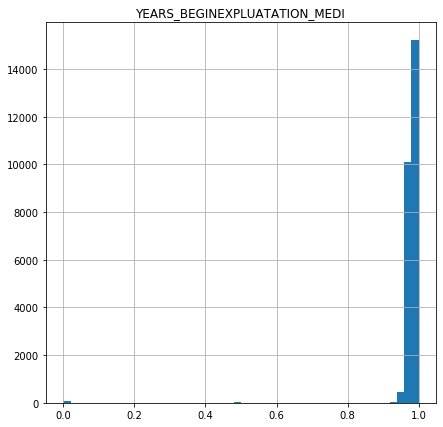

-------------------------------------------------------
YEARS_BUILD_MEDI


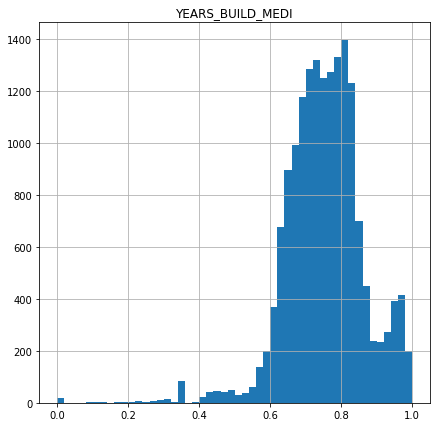

-------------------------------------------------------
COMMONAREA_MEDI


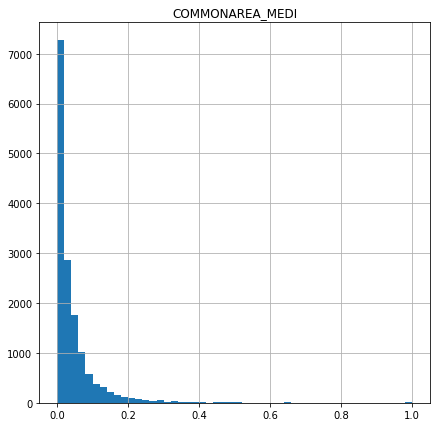

-------------------------------------------------------
ELEVATORS_MEDI


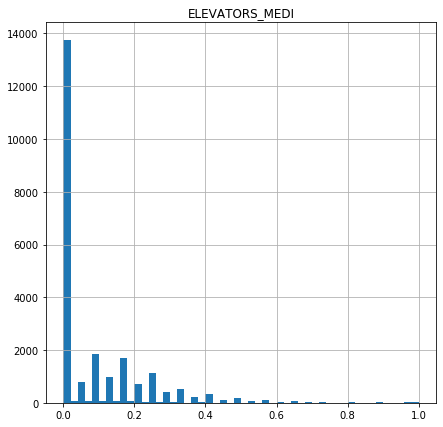

-------------------------------------------------------
ENTRANCES_MEDI


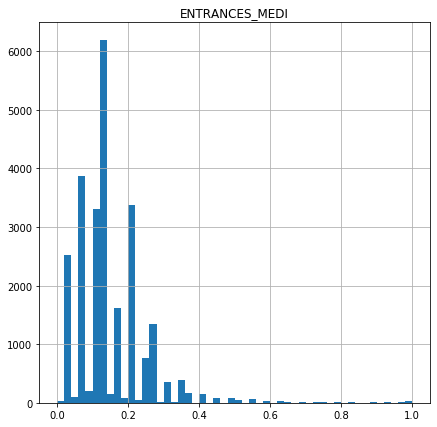

-------------------------------------------------------
FLOORSMAX_MEDI


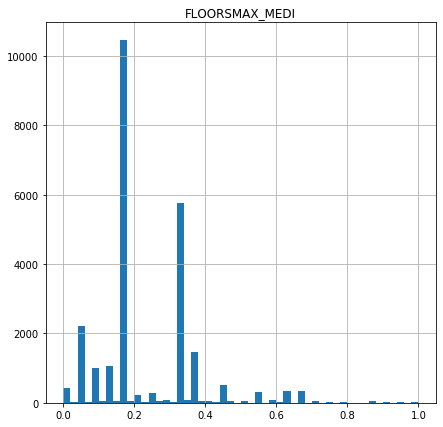

-------------------------------------------------------
FLOORSMIN_MEDI


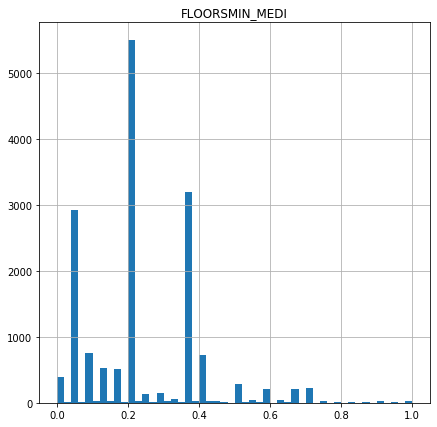

-------------------------------------------------------
LANDAREA_MEDI


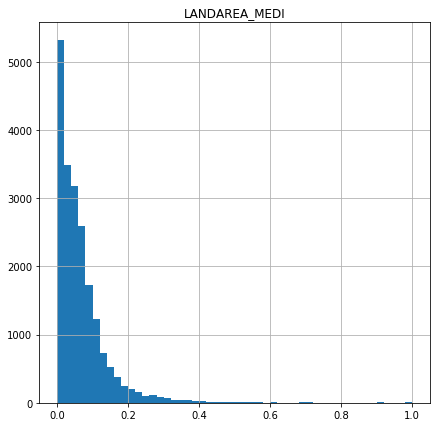

-------------------------------------------------------
LIVINGAPARTMENTS_MEDI


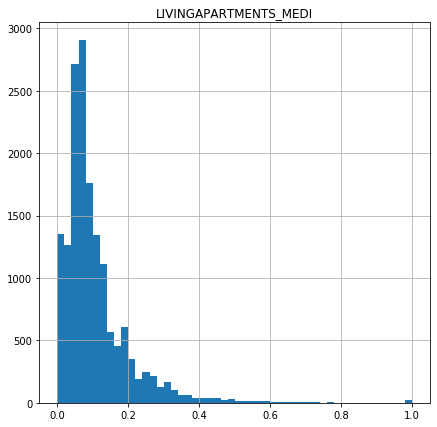

-------------------------------------------------------
LIVINGAREA_MEDI


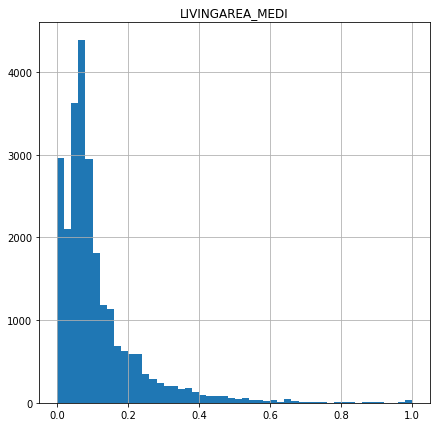

-------------------------------------------------------
NONLIVINGAPARTMENTS_MEDI


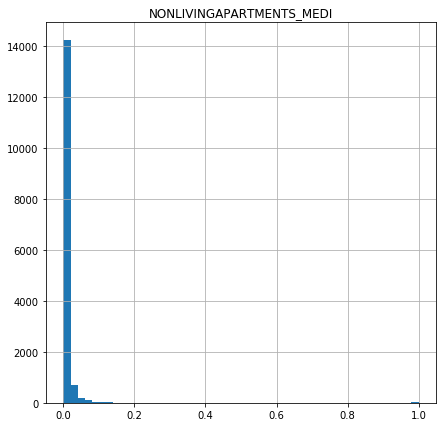

-------------------------------------------------------
NONLIVINGAREA_MEDI


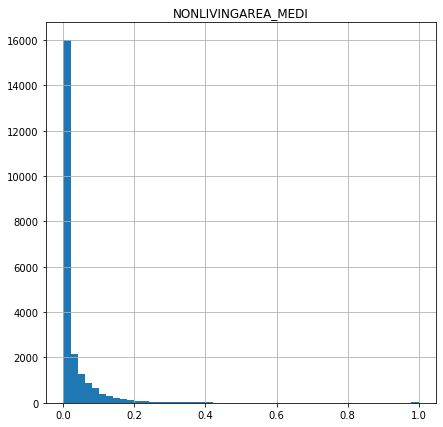

-------------------------------------------------------
TOTALAREA_MODE


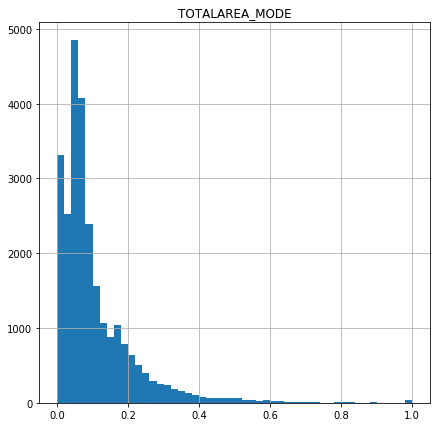

-------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE


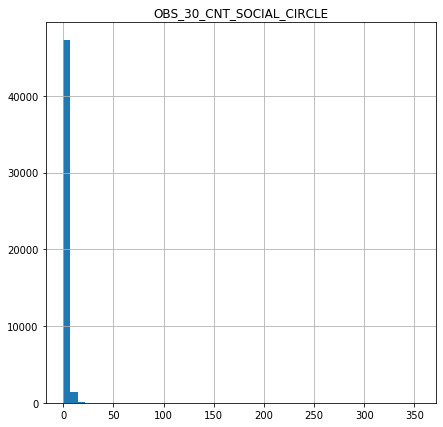

-------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE


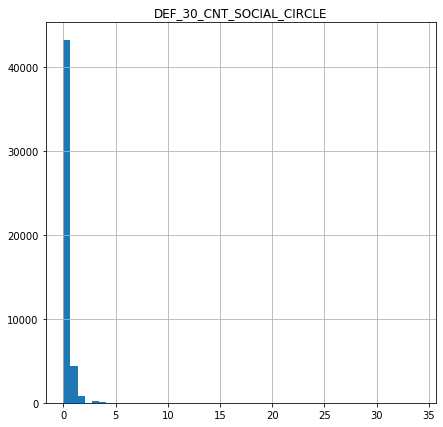

-------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE


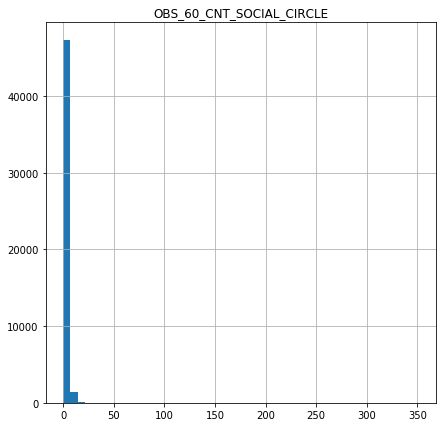

-------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE


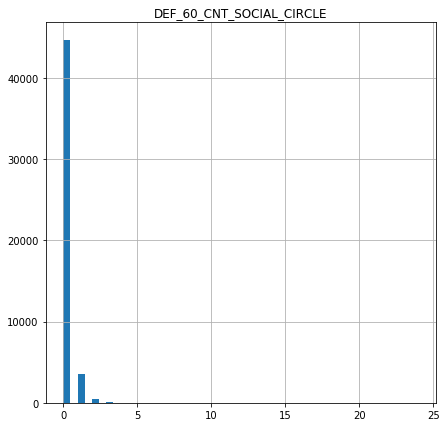

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR


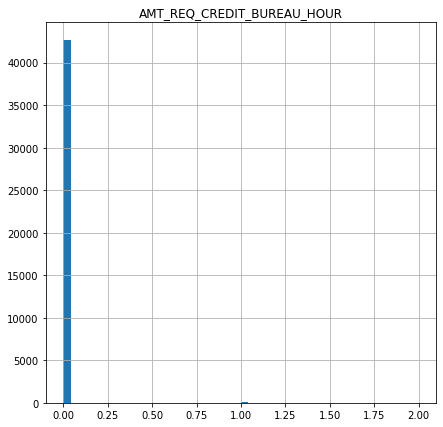

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY


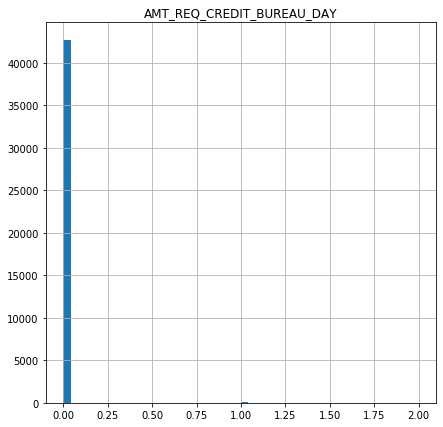

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK


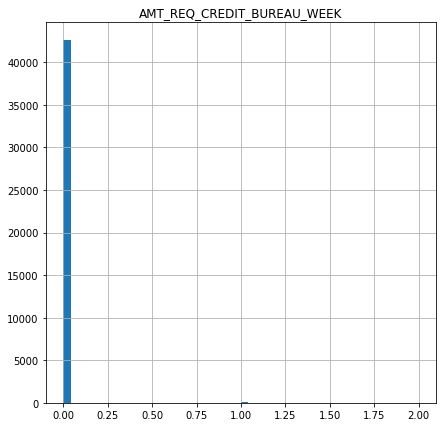

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON


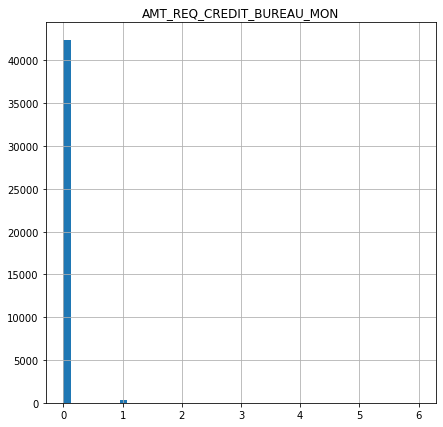

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT


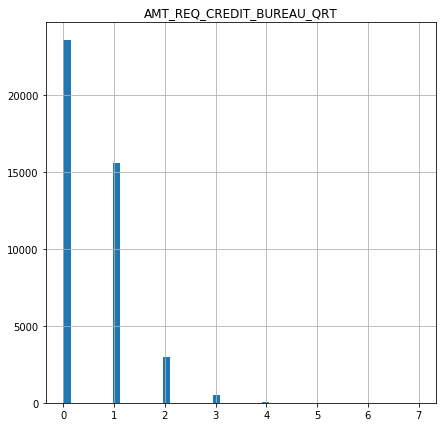

-------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR


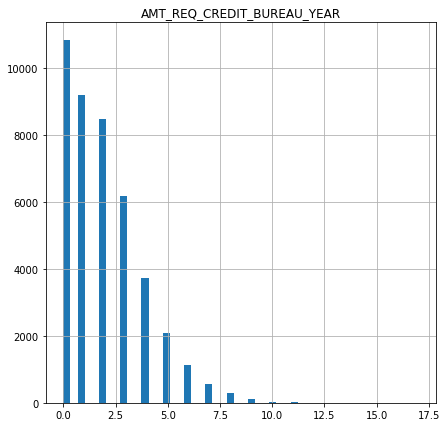

-------------------------------------------------------


In [39]:
# 先篩選數值型的欄位
# 使用pd.select_dtypes(include = 'wanted data type')
numeric_columns = app_train.select_dtypes(include = ['float64','int64']) 
dtype_select = ['float64','int64']

numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉 
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns" ,len(numeric_columns))

# 檢視這些欄位的數值範圍 Because this function is to check the number's range
# so no need to print out the meaning of x,y labels
for col in numeric_columns:
    print(col)
    plt.figure(figsize=(7,7))
    app_train[col].hist(bins=50)
    plt.title(col)
    plt.show()
    print('-------------------------------------------------------')

* 從上面圖檢查結果，可發現以下幾個欄位可能有outliers
1. CNT Children (有離群數)
2. Region Rating Client_W_city
3. CNT_FAM_Members
4. HOUR_APPR_PROCESS_START
5. DAY_LAST_PHONE_CHANGE
6. DAY_EMPLOYED (35,000 days means almost 100 years)

## Hints: Emprical Cumulative Density Plot, ECDF, ECDF with Python
Reference (ECDF)[https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0]

(ECDF on Python)[https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function]

In [40]:
def ecdf(data):
    xs = np.sort(data)
    ys = np.arange(1,len(xs)+1)/float(len(xs))
    return xs ,ys

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


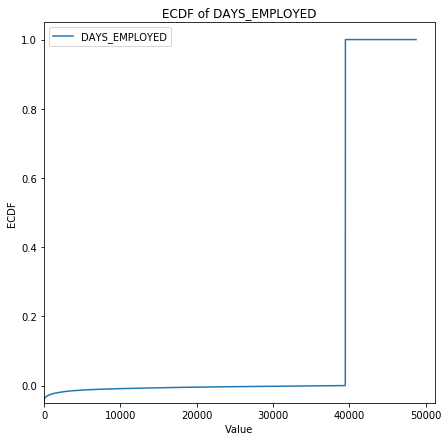

Int64Index([ 1796, 46997, 15483,  4479, 19770, 35743, 20126, 47793, 23095,
            17924,
            ...
            26228, 26227, 39845, 26225, 39848, 26220, 26219, 39852, 39819,
            32183],
           dtype='int64', length=48744)


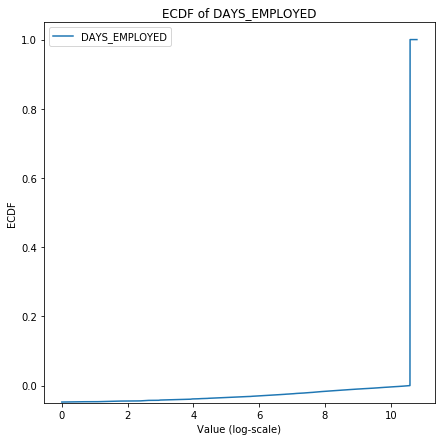

In [41]:
#最大值離平均與中位數很遠
print(app_train['DAYS_EMPLOYED'].describe())

cdf = app_train['DAYS_EMPLOYED'].sort_values()

# 繪製 Empirical Cumulative Density Plot (ECDF)
x, y = ecdf(app_train['DAYS_EMPLOYED'])
plt.figure(figsize=(7,7))
plt.plot(range(1,len(cdf.index)+1),cdf/cdf.max(),label = "DAYS_EMPLOYED")
plt.title('ECDF of DAYS_EMPLOYED')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(),cdf.index.max()*1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

print(cdf.index)
# 改變 x 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.figure(figsize=(7,7))
plt.plot(np.log(range(1,len(cdf.index)+1)),cdf/cdf.max(),label="DAYS_EMPLOYED")
plt.title('ECDF of DAYS_EMPLOYED')
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.legend()
plt.show()

count    4.874400e+04
mean     5.167404e+05
std      3.653970e+05
min      4.500000e+04
25%      2.606400e+05
50%      4.500000e+05
75%      6.750000e+05
max      2.245500e+06
Name: AMT_CREDIT, dtype: float64


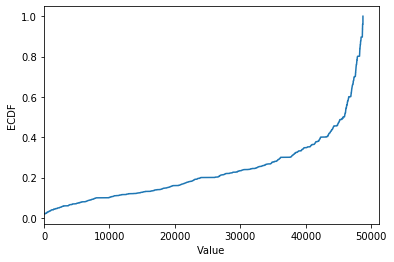

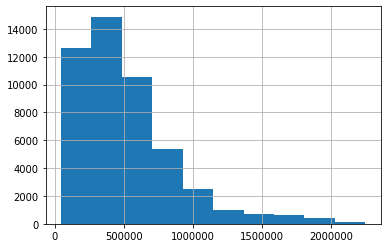

450000.0     2118
225000.0     1836
675000.0     1426
360000.0      839
900000.0      835
             ... 
557959.5        1
311890.5        1
1903023.0       1
508527.0        1
648432.0        1
Name: AMT_CREDIT, Length: 2937, dtype: int64

In [42]:
# 最大值落在分布之外
print(app_train['AMT_CREDIT'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = app_train['AMT_CREDIT'].sort_values()


plt.plot(range(1,len(cdf.index)+1), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min()*0.95,cdf.index.max()*1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['AMT_CREDIT'].hist()
plt.show()
app_train['AMT_CREDIT'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

### *comment : 當histogram 劃出X軸延伸很長的徒而導致右邊有一大邊空白時，代表右邊有值但數量很少(outliers出現)，可以使用value_count 去尋找outliers 值

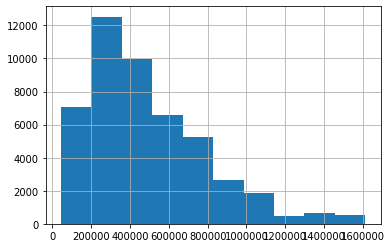

In [48]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 AMT_CREDIT 在 99.7信賴區間內的資料點繪製
loc_a = app_train['AMT_CREDIT'] < app_train['AMT_CREDIT'].mean() + 3*app_train['AMT_CREDIT'].std() 
loc_b = 'AMT_CREDIT'

app_train.loc[loc_a, loc_b].hist()
plt.show()

* 可以比較並發現 IN[42] & IN[43] 的X軸減少了許多，就是因為被剃除了outfilers(本次定義AMT_CREDIT值超過三個信賴區間者)
